<h1>COVID-19: Forecasting the Number of New Infections for DACH Region</h1>

### Abstract ###

Djamil Yousefi is a graduate M.Sc. Economics with a specialization in Econometrics and Applied Economics. This Notebook is primarily intended to help researchers to get more familiar with standard techniques from the time series analysis which are essential for empirical forecastings. Since COVID-19 is currently a very hot topic, the analysis is based on forecasting the number of new infections of COVID-19 for Germany, Austria, and Switzerland (DACH-region). If you have any remarks, please feel free to contact me by mail djamil.yousefi@googlemail.com or on LinkedIn.

# Data

In this chapter, we will introduce the data set which is considered in this work. The source of the data is the EU Open Data Portal (EU ODP). EU ODP enables the user to have data on the geographic distribution of COVID-19 cases worldwide. First, the data set of worldwide cases is downloaded. From the worldwide data, the NI for the countries Austria, Germany, and Switzerland are extracted and merged with an additional sheet. This procedure is done via excel.

The complete data range goes from 01/01/2020 till 06/10/2020, which leads to a total of $T$ = 162 observations. The frequency is given daily. 

In [1]:
# Lets import the functions, which are needed for the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from sklearn.metrics import mean_squared_error

In the next step, we will import the data of the three countries in CSV.

In [2]:
### I. Import Data and Data Analysis
# load data into workspace 
data = pd.read_csv("/Users/djamilyousefi/Desktop/COVID19/data.csv")
date = data.Date
date.iloc[:] = date.iloc[::-1].values

/Users/djamilyousefi/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Let us analyze the NI for each country seperately. Starting with Germany:

In [3]:
# For Germany
drate =  data.Germany
drate.iloc[:] = drate.iloc[::-1].values

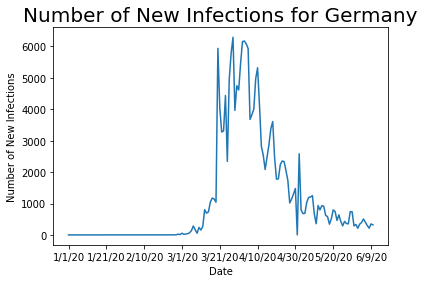

In [4]:
# plotting

tick_spacing = 20

fig, ax = plt.subplots(1,1)
ax.plot(date,drate)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xlabel('Date')
plt.ylabel('Number of New Infections')
plt.title('Number of New Infections for Germany', fontsize=20)
plt.show()

Considering the plot for Germany we can detect for the time range from 01/01/2020 till 03/01/2020 that the NI is roughly zero. An exploratory increase up to a NI of roughly 6000 can be identified after March. Thereafter, the NI fluctuates between a range of 6000 - 4000, with an exception of a drop to 2500. From April 2020, a decrease continously in the NI can be analyzed. The decline can be explained by the fact that the political actions against COVID-19 worked well. Next, the plots of the NI for the countries Austria and Switzerland will be described.

In [5]:
# For Austria
arate =  data.Austria
arate.iloc[:] = arate.iloc[::-1].values

/Users/djamilyousefi/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


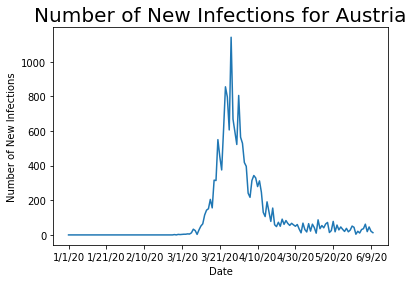

In [6]:
# plotting

tick_spacing = 20

fig, ax = plt.subplots(1,1)
ax.plot(date,arate)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xlabel('Date')
plt.ylabel('Number of New Infections')
plt.title('Number of New Infections for Austria', fontsize=20)
plt.show()

In [7]:
# For Switzerland
srate =  data.Switzerland
srate.iloc[:] = srate.iloc[::-1].values

/Users/djamilyousefi/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


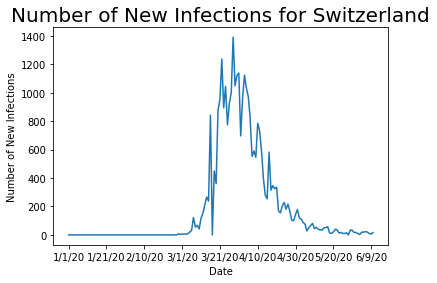

In [8]:
# plotting

tick_spacing = 20

fig, ax = plt.subplots(1,1)
ax.plot(date,srate)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xlabel('Date')
plt.ylabel('Number of New Infections')
plt.title('Number of New Infections for Switzerland', fontsize=20)
plt.show()

Comparing the plots of Austria and Switzerland with that of Germany, it can be identified that the NI in these two countries was also 0 till March. After March an enormous increase up to over 1000 cases in Austria and up to 1400 cases in Switzerland can be seen. Comparing the NI between these two countries and Germany, it can be mentioned that the NI with roughly 6000 was much higher in Germany. In both countries, a decline in NI can be detected after April, whereby the decline in Austria was somewhat stronger compared to the decline in Switzerland. After visualizing and describing the NI of these three countries, in the next step, we will investigate statistically if the time series of the NI is stationary. A stationary process is needed and should be guaranteed before the model choice, model estimation, and forecasts. A process is stationary if the mean and the variance of the process are time-invariant. Furthermore, the process should bump around a mean and should show mean-reverting behavior.  

One way to test empirically for a stationary process is to conduct an Augmented Dickey Full (ADF) test.

# Testing for Non-Stationary Process, Augmented Dickey Fuller (ADF) Test

From the visual perspective it can be detected that the time series of the NI for the three countries bumps around zero mean. Therefore we will use the first case of the ADF test, which is not including a deterministic term. The test hypothesis looks as follows:

**Hypothesis pair:** $H_{0}$: unit root vs. $H_{1}$: stationary process with zero mean 



In [9]:
# ADF-Test for Germany
d_adf = adfuller(drate, regression="nc", autolag ="AIC")
print('ADF Statistic: %f' % d_adf[0])
print('p-value: %f' % d_adf[1])
print('Critical Values:')
for key, value in d_adf[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.976067
p-value: 0.046025
Critical Values:
	1%: -2.581
	5%: -1.943
	10%: -1.615


In [10]:
# ADF-Test for Austria        
a_adf = adfuller(arate, regression="nc", autolag ="AIC")
print('ADF Statistic: %f' % a_adf[0])
print('p-value: %f' % a_adf[1])
print('Critical Values:')
for key, value in a_adf[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.682778
p-value: 0.087466
Critical Values:
	1%: -2.581
	5%: -1.943
	10%: -1.615


In [11]:
# ADF-Test for Switzerland

s_adf = adfuller(srate, regression="nc", autolag ="AIC")
print('ADF Statistic: %f' % a_adf[0])
print('p-value: %f' % a_adf[1])
print('Critical Values:')
for key, value in a_adf[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.682778
p-value: 0.087466
Critical Values:
	1%: -2.581
	5%: -1.943
	10%: -1.615


### ADF Test Results based on the Levels for Germany, Austria and Switzerland ###

|           | ADF Statistic | Critical Value for $\alpha$ = 0.05 | p-Value |
|-----------|---------------|------------------------------      |---------|
|Germany    |     -1.98     |             -1.94                  |   0.05  |
|Austria    |     -1.68     |             -1.94             |   0.08  |
|Switzerland|     -1.68     |             -1.94             |   0.09  |

From the ADF test results table, we can not reject the null hypothesis of a unit root process for Austria and Switzerland. Therefore based on the statistical test we found evidence that the process of NI for Austria and Switzerland is not stationary. For Germany, it can be identified that we have a borderline case. Due to the special case, the researcher can decide on his own, to reject the null hypothesis of a unit root or not. As also known in the time series literature the ADF test has relatively low power in borderline cases. Therefore in that case it is decided to not reject the null hypothesis of a unit root process for Germany.

**Now the question arises on how to handle a unit root process?** One way is to calculate the first difference of the process. In the following, the first differences of the three processes will be calculated.

In [12]:
# define a function for calculating the first difference
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

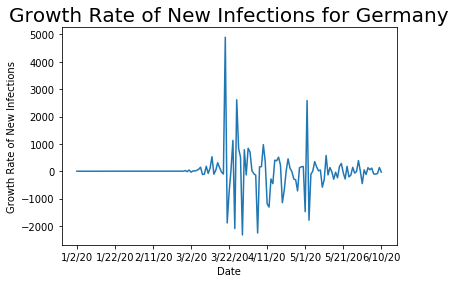

In [13]:
# Calculate the first difference of the process for Germany    

diff_drate = difference(drate)

# plot the growth rate of the number of new infections for germany
tick_spacing = 20

fig, ax = plt.subplots(1,1)
ax.plot(date[1:],diff_drate)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xlabel('Date')
plt.ylabel('Growth Rate of New Infections')
plt.title('Growth Rate of New Infections for Germany', fontsize=20)
plt.show()

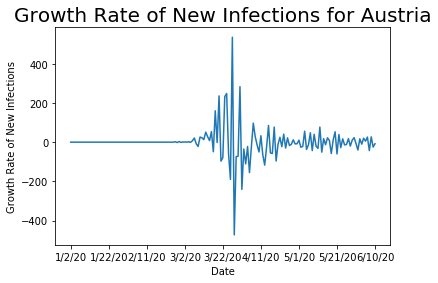

In [14]:
# Calculate the first difference of the process for Austria

diff_arate = difference(arate)

# plot the growth rate of infection rate for austria
tick_spacing = 20

fig, ax = plt.subplots(1,1)
ax.plot(date[1:],diff_arate)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xlabel('Date')
plt.ylabel('Growth Rate of New Infections')
plt.title('Growth Rate of New Infections for Austria', fontsize=20)
plt.show()

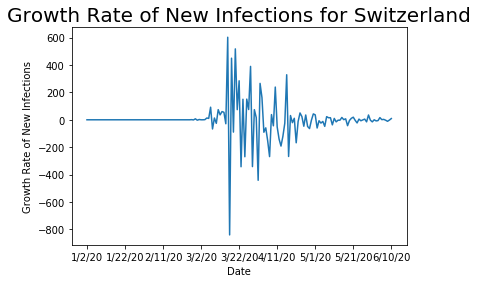

In [15]:
# Calculate the first difference of the process for Switzerland

diff_srate = difference(srate)

# plot the growth rate of infection for Switzerland
tick_spacing = 20

fig, ax = plt.subplots(1,1)
ax.plot(date[1:],diff_srate)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xlabel('Date')
plt.ylabel('Growth Rate of New Infections')
plt.title('Growth Rate of New Infections for Switzerland', fontsize=20)
plt.show()

From a visual perspective, the assumption that a process should bump around a constant mean and show mean-reverting behavior can be identified in the three plots. However, in the following, it will be tested again statistically if the process of the first difference is stationary. Therefore the ADF test for the first differences will be conducted.

In [16]:
# Test if the process of the first difference for Germany is stationary

diffdrate_adf = adfuller(diff_drate, regression="nc", autolag ="AIC")
print('ADF Statistic: %f' % diffdrate_adf[0])
print('p-value: %f' % diffdrate_adf[1])
print('Critical Values:')
for key, value in diffdrate_adf[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.615323
p-value: 0.008643
Critical Values:
	1%: -2.581
	5%: -1.943
	10%: -1.615


In [17]:
# Test if the process of the first difference for Austria is stationary

diffarate_adf = adfuller(diff_arate, regression="nc", autolag ="AIC")
print('ADF Statistic: %f' % diffarate_adf[0])
print('p-value: %f' % diffarate_adf[1])
print('Critical Values:')
for key, value in diffarate_adf[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.183443
p-value: 0.000035
Critical Values:
	1%: -2.581
	5%: -1.943
	10%: -1.615


In [18]:
# Test if the process of the first difference for Switzerland is stationary

diffsrate_adf = adfuller(diff_srate, regression="nc", autolag ="AIC")
print('ADF Statistic: %f' % diffsrate_adf[0])
print('p-value: %f' % diffsrate_adf[1])
print('Critical Values:')
for key, value in diffsrate_adf[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.795293
p-value: 0.005060
Critical Values:
	1%: -2.581
	5%: -1.943
	10%: -1.615


### ADF Test Result based on the First Differences for Germany, Austria and Switzerland ###

|           | ADF Statistic | Critical Value for $\alpha$ = 0.05 | p-Value |
|-----------|---------------|------------------------------      |---------|
|Germany    |     -2.62     |             -1.94                  |   0.01  |
|Austria    |     -4.18     |             -1.94                  |   0.00  |
|Switzerland|     -2.80     |             -1.94                  |   0.01  |

Considering the ADF test result table, it can be highlighted that for a significance level of $\alpha$ = 0.05 the null hypothesis of a unit root for the first difference process can be rejected for all three cases, since the p-value is smaller than the considered significance level of 0.05. Therefore evidence was found that the first differences of Germany, Austria, and Switzerland are stationary. It holds that: 

Germany - $I$(1) and $\Delta$ Germany - $I$(0)

Austria - $I$(1) and $\Delta$ Austria - $I$(0)

Switzerland - $I$(1) and $\Delta$ Switzerland - $I$(0)

# Model Choice #

A good starting point to find an appropriate model for the process of interest is to analyze the autocorrelation function (ACF) and the partial autocorrelation function (PACF). In the following, the ACF and the PACF plots for the three processes will be provided.

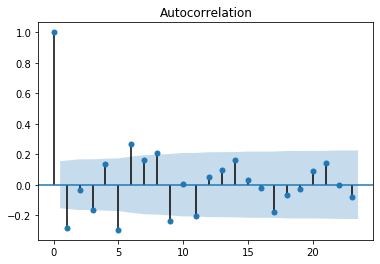

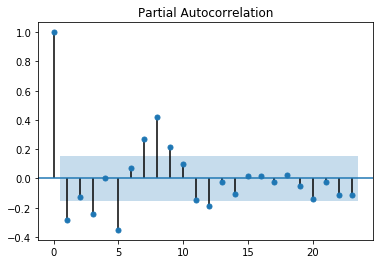

In [19]:
# Model Choice 
    
# ACF and PACF for the first difference process of Germany
diff_drate = np.array(diff_drate)

plot_acf(diff_drate)
plot_pacf(diff_drate)
plt.show()

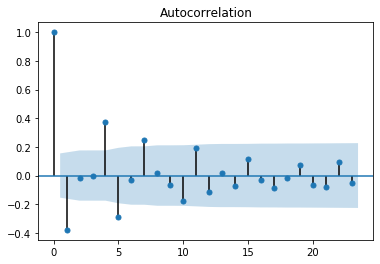

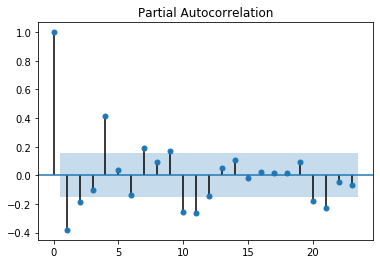

In [20]:
# ACF and PACF for the first difference process of Austria
diff_arate = np.array(diff_arate)

plot_acf(diff_arate)
plot_pacf(diff_arate)
plt.show()

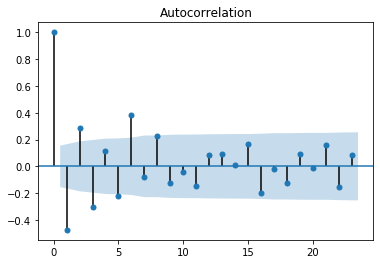

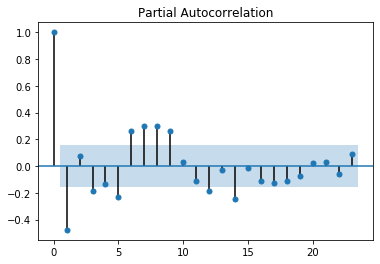

In [21]:
# ACF and PACF for the first difference process of Switzerland

diff_srate = np.array(diff_srate)

plot_acf(diff_srate)
plot_pacf(diff_srate) 
plt.show()

### Model Choice for the First Difference Processes for Germany, Austria and Switzerland ###

||Model|
|-------|------------|
|Germany|AR(9)|
|Austria|AR(10)|
|Switzerland|AR(9)|

In that case, I decided to consider the PACFs. It seems that for the first difference processes autocorrelations exist up to 9 lags for Germany and Switzerland and up to 10 lags for Austria. Significant autocorrelations can be identified by crossing the $\pm \frac{2}{\sqrt{T}}$ bands, which is marked by the blue area in the PACFs. Since we have daily frequencies and we will analyze the in-sample-fit, a model with a higher lag order is probably more suitable. Before considering the In-Sample-Fit, lets introduce the model which is used for further analysis in his general form.

## Autoregressive Model ##

An autoregressive (AR) model of order $p$, AR($p$), without an intercept parameter takes the following form: 

$y_{t} = \alpha_{1}y_{t-1} + \alpha_{2}y_{t-2} + ...+ \alpha_{p}y_{t-p} + \epsilon_{t}$, 

where $\alpha_{i}$ with $i = 1,...,p$ denotes the corresponding lag coefficient and $\epsilon_{t}$ follows a white noise process. Since the lag coefficients are unknown, they have to be estimated. One way to estimate the unknown coefficient parameters is the method of ordinary least squares (OLS), which minimizes the sum of squared residuals. The OLS estimator can be obtained by rewriting the model compactly as

$y_{t} = Y_{t-1}'\alpha + \epsilon_{t}$ ,

where $Y_{t-1} = (y_{t-1}, ...,y_{t-p})'$ and $\alpha = (\alpha_{1}, ..., \alpha_{p})'$. Using the OLS method the estimator for $\alpha$ is described as

$\hat \alpha = (\sum_{t=1}^{T}Y_{t-1}Y_{t-1}')^{-1}\sum_{t=1}^{T}Y_{t-1}y_{t}$.

In the following, for the fit, the built-in function ARIMA() will be used. 

### In-Sample-Fit Analysis ###

In [22]:
# AR(9) Fit for the First Difference process for Germany

model1 = ARIMA(diff_drate, order=(9,0,0))
model1_fit = model1.fit(disp=False, trend='nc')
print(model1_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  161
Model:                     ARMA(9, 0)   Log Likelihood               -1237.870
Method:                       css-mle   S.D. of innovations            523.830
Date:                Mon, 13 Jul 2020   AIC                           2495.740
Time:                        17:19:33   BIC                           2526.554
Sample:                             0   HQIC                          2508.252
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.5066      0.077     -6.552      0.000      -0.658      -0.355
ar.L2.y       -0.3132      0.078     -4.002      0.000      -0.467      -0.160
ar.L3.y       -0.1980      0.074     -2.674      0.0

Focusing on the upper part of the table, one can detect that there are many significant parameters for a significance level of $\alpha = 0.05$, since many p-values of the estimated coefficients are smaller than $\alpha = 0.05$. To give an interpretation of the estimated results, the estimated parameter for the first lag can be considered, which exhibits an estimated value of -0.51. Assuming the growth rate of new infection from the day before yesterday to yesterday is negative, an increase in the growth rate from yesterday to today can be expected. Assuming that the growth rate between the day before yesterday to yesterday is positive, a drop in the growth rate from yesterday to today can be expected.

In [23]:
# AR(10) Fit for the First Difference Process for Austria

model2 = ARIMA(diff_arate, order=(10,0,0))
model2_fit = model2.fit(disp=False, trend='nc')
print(model2_fit.summary())   



                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  161
Model:                    ARMA(10, 0)   Log Likelihood                -896.169
Method:                       css-mle   S.D. of innovations             62.879
Date:                Mon, 13 Jul 2020   AIC                           1814.337
Time:                        17:19:38   BIC                           1848.233
Sample:                             0   HQIC                          1828.100
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.4049      0.076     -5.302      0.000      -0.555      -0.255
ar.L2.y       -0.0755      0.082     -0.918      0.359      -0.237       0.086
ar.L3.y        0.0947      0.082      1.157      0.2

In [24]:
# AR(9) Fit for the First Difference Process for Switzerland

model3 = ARIMA(diff_srate, order=(9,0,0))
model3_fit = model3.fit(disp=False, trend='nc')
print(model3_fit.summary())  

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  161
Model:                     ARMA(9, 0)   Log Likelihood                -968.384
Method:                       css-mle   S.D. of innovations             98.295
Date:                Mon, 13 Jul 2020   AIC                           1956.769
Time:                        17:19:42   BIC                           1987.583
Sample:                             0   HQIC                          1969.281
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.6287      0.076     -8.233      0.000      -0.778      -0.479
ar.L2.y       -0.1660      0.085     -1.951      0.051      -0.333       0.001
ar.L3.y       -0.1687      0.078     -2.162      0.0

# Model Checking \& Validation #

One way to check if the model was able to capture all the serial autocorrelation, is the visual analysis of the residuals. In the following, the ACF and the PACF of the residuals will be analyzed. It holds that, roghly 95% of the residuals should be within a $\pm \frac{2}{\sqrt{T}}$ band around zero. 
Starting with the residual plot for Germany: 

### Analyzing the ACF and PACF of the Residuals ###

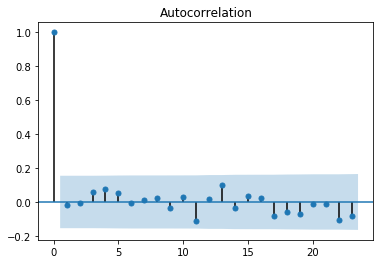

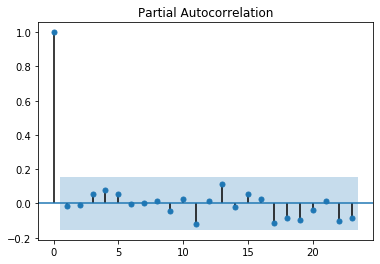

In [25]:
# ACF and PACF of the Residuals for Germany

residuals1 = DataFrame(model1_fit.resid)
plot_acf(residuals1)
plot_pacf(residuals1)
plt.show()

Analyzing the ACF and the PACF of the residual process for Germany, it can be identified that there are no remaining autocorrelations. Therefore, from the visual perspective, it can be concluded that the model 
is adequate. 

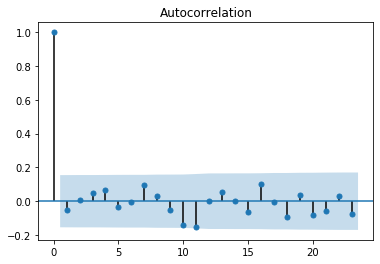

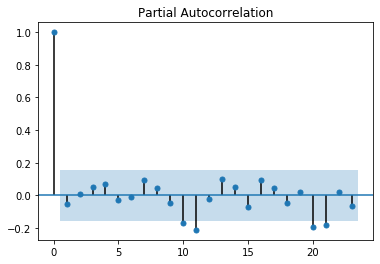

In [26]:
# ACF and PACF of the Residuals for Austria

residuals2 = DataFrame(model2_fit.resid)
plot_acf(residuals2)
plot_pacf(residuals2)
plt.show()

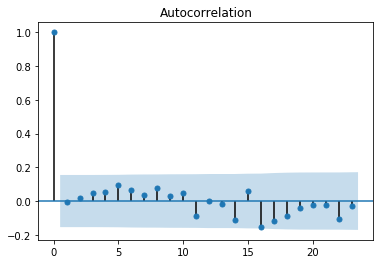

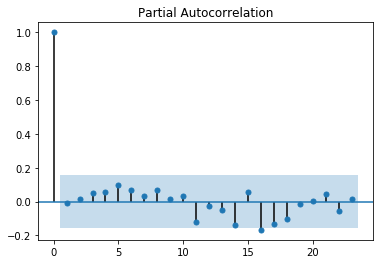

In [27]:
# ACF and PACF of the Residuals for Switzerland

residuals3 = DataFrame(model3_fit.resid)
plot_acf(residuals3)
plot_pacf(residuals3)
plt.show()

Considering the ACF and PACF plots of the residuals for the three countries, it can be concluded that roughly 95% of the residuals autocorrelations are within the $\pm \frac{2}{\sqrt{T}}$, which indicates that the model was able to capture all the significant autocorrelations.


### Portmanteau Test for Serial Correlation ###

In the following, it will be tested statistically if there is no remaining residual autocorrelation. The hypothesis pair takes the following form: 

**Hypothesis pair:** $H_{0}: \rho_{\epsilon,1}=...=\rho_{\epsilon,h} = 0$  vs. $H_{1}: \rho_{\epsilon,i} \neq 0$ for at least one $i=1,...,h$,

where $\rho_{\epsilon,i} = Corr(\epsilon_{t}, \epsilon_{t-i})$ denotes the autocorrleation coefficient of the residual series at lag $i$.


In [28]:
# Portmanteau Test for Serial Correlation in the Residuals for Germany

sm.stats.acorr_ljungbox(residuals1, lags=[20])

/Users/djamilyousefi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


(array([9.99181401]), array([0.96832013]))

In [29]:
# Portmanteau Test for Serial Correlation in the Residuals for Austria

sm.stats.acorr_ljungbox(residuals2, lags=[20])

(array([17.70719147]), array([0.60669011]))

In [30]:
# Portmanteau Test for Serial Correlation in the Residuals for Switzerland

sm.stats.acorr_ljungbox(residuals3, lags=[20])

(array([18.02211743]), array([0.5859512]))

### Portmanteau Test Result Table ###

||Test Statistic|p-Value|  
|--------|------|-------|
|Germany|9.99|0.97|
|Austria|17.71|0.61|
|Switzerland|18.02|0.59|

For a significance level of $\alpha = 0.05$ the null hypothesis of no remaining autocorrelation in the residuals can not be rejected for all three cases. Therefore, evidence was found that the models are adequate. 

After it is ensured that the models are able to capture the significant autocorrelations of the processes, in the next step the forecasting performance will be discussed.

# Forecasting # 

### Pseudo-out-of-Sample Forecasting ###

Pseudo-out-of-sample forecasting enables the researcher to evaluate the forecasting performance. Since it is the prediction of a data range which is already known, the error, which is the deviation between the true observation and the prediction, can be measured. Furthermore, the forecasting models can be examined regarding their exactness and reliability. 

In the following, a rolling estimation window of 108 observations is used for one-step-ahead predictions $h$ = 1, which leads to a forecast window length of 54 observations.

First considering a general AR($p$) process without an intercept parameter, the $h$-step-ahead forecast is denoted by 

$\hat y_{T+h|T} = \hat \alpha_{1}\hat y_{T+h-1|T} + ... + \hat \alpha_{p}\hat y_{T+h-p|T}$, 

where each $\hat \alpha_{i}$ with $i$ = 1,...,$p$ denotes the estimated lag coefficients, obtained by the OLS estimation. It holds that $\hat y_{T+j|T} = y_{T+j}$ for $j < 0 $. 

Personally, for forecasting I decided to use a more parsimonious model with fixed lags. Therefore the forecasts are based on an AR(2) model for all three processes. 

511.8233554541232


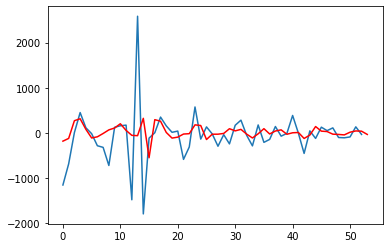

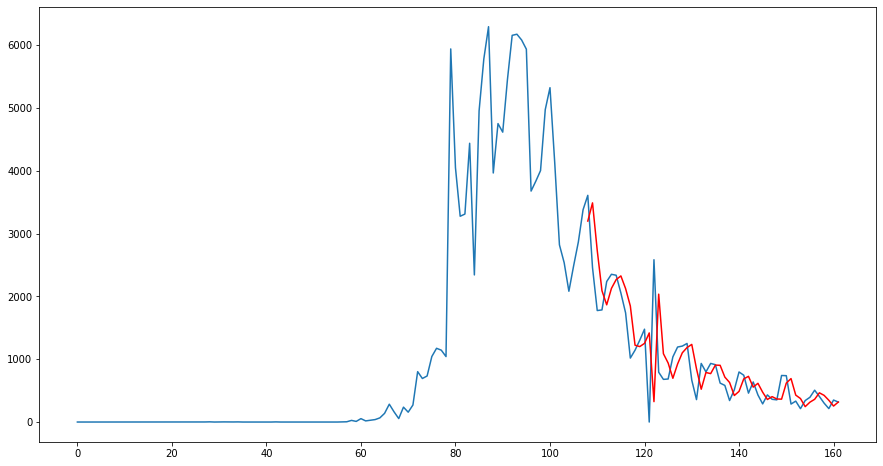

In [31]:
# 1-step-ahead forecasts

H=54

# For Germany

pred1=np.zeros((H,))
level_pred1 = np.zeros((H,))
for i in range(H):
    window = diff_drate[i:107+i]
    model1 = ARIMA(window, order=(2,0,0))
    model1_fit = model1.fit(trend = 'nc', disp=0)
    # one step forecast
    pred1[i] = model1_fit.forecast()[0]    
    level_pred1[i] = pred1[i] + drate[107+i] #get levels

rmse1 = np.sqrt(mean_squared_error(drate[108:], level_pred1))
print(rmse1)     
    
plt.plot(diff_drate[108:])
plt.plot(pred1, color='red')

df_new = pd.DataFrame(drate)
df_new.columns = ['test1']

# Retrieve index values
new_index = df_new['test1'].tail(len(level_pred1)).index

# Make a dataframe with your prediction values and your index
new_series = pd.DataFrame(index = new_index, data = level_pred1)

# Merge the dataframes
df_new = pd.merge(df_new, new_series, how = 'left', left_index=True, right_index=True)
df_new.columns = ['test1', 'predictions1']

# plot it
plt.figure(figsize=(15,8))
plt.plot(df_new['test1'])
plt.plot(df_new['predictions1'], color = 'red')
plt.show()   

26.385077479780904


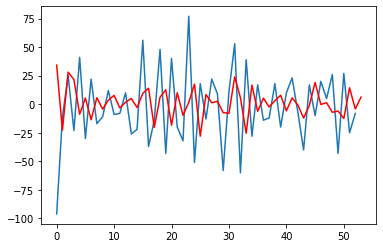

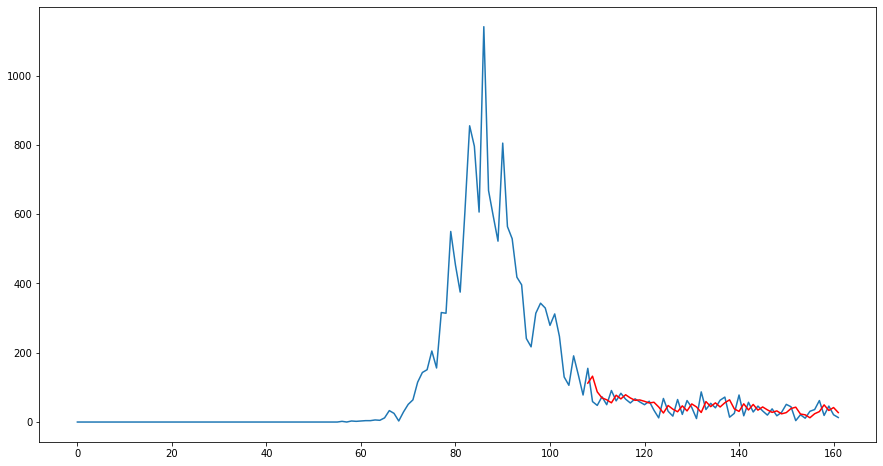

In [32]:
# For Austria

pred2=np.zeros((H,))
level_pred2 = np.zeros((H,))
for i in range(H):
    window = diff_arate[i:107+i]
    model2 = ARIMA(window, order=(2,0,0))
    model2_fit = model2.fit(trend = 'nc', disp=0)
    # one step forecast
    pred2[i] = model2_fit.forecast()[0]    
    level_pred2[i] = pred2[i] + arate[107+i] #get levels
    
rmse2 = np.sqrt(mean_squared_error(arate[108:], level_pred2))
print(rmse2)  
    
plt.plot(diff_arate[108:])
plt.plot(pred2, color='red')
plt.show()

df_new2 = pd.DataFrame(arate)
df_new2.columns = ['test2']

# Retrieve index values
new_index2 = df_new2['test2'].tail(len(level_pred2)).index

# Make a dataframe with your prediction values and your index
new_series2 = pd.DataFrame(index = new_index2, data = level_pred2)

# Merge the dataframes
df_new2 = pd.merge(df_new2, new_series2, how = 'left', left_index=True, right_index=True)
df_new2.columns = ['test2', 'predictions2']

# And plot it
plt.figure(figsize=(15,8))
plt.plot(df_new2['test2'])
plt.plot(df_new2['predictions2'], color = 'red')
plt.show()

39.84333093867094


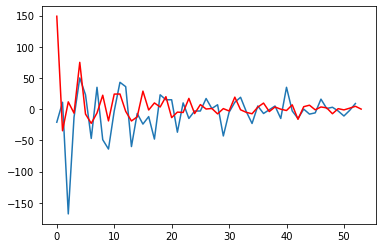

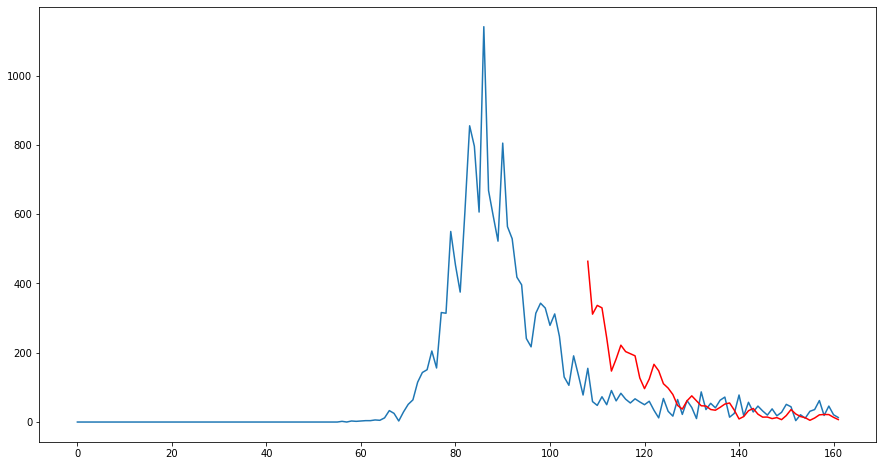

In [33]:
# for Switzerland

pred3 = np.zeros((H,))
level_pred3 = np.zeros((H,))
for i in range(H):
    window = diff_srate[i:107+i]
    model3 = ARIMA(window, order=(2,0,0))
    model3_fit = model3.fit(trend = 'nc', disp=0)
    # one step forecast
    pred3[i] = model3_fit.forecast()[0]    
    level_pred3[i] = pred3[i] + srate[107+i] #get levels

rmse3 = np.sqrt(mean_squared_error(srate[108:], level_pred3))
print(rmse3)      
        
plt.plot(diff_srate[108:])
plt.plot(pred3, color='red')
plt.show()

df_new3 = pd.DataFrame(arate)
df_new3.columns = ['test3']

# Retrieve index values
new_index3 = df_new3['test3'].tail(len(level_pred3)).index

# Make a dataframe with your prediction values and your index
new_series3 = pd.DataFrame(index = new_index3, data = level_pred3)

# Merge the dataframes
df_new3 = pd.merge(df_new3, new_series3, how = 'left', left_index=True, right_index=True)
df_new3.columns = ['test3', 'predictions3']

# And plot it
plt.figure(figsize=(15,8))
plt.plot(df_new3['test3'])
plt.plot(df_new3['predictions3'], color = 'red')
plt.show()



### Root Mean Squared Error for 1-Step-Ahead-Prediction of the Processess ###

||RMSE|
|----|----|
|Germany|511.82|
|Austria|26.38|
|Switzerland|39.84|

Focusing on the forecasting plots, it can be detected that the models can predict the corresponding forecast window very well. Considering the RMSE table, the highest value can be obtained by Germany with 511.82, which is surprisingly high compared to the RMSE error of Austria with 26.38 and 39.84.

Next, we will do some true-out-of-sample forecasts. True-out-of-sample forecasts are forecasts of observations that lie in the future and are nowadays unknown. It is the ultimate test of a forecast model because the forecasting performance in "real-time" can be obtained. 

### True-Out-of-Sample Forecasting ### 

In the following, true-out-of-sample forecasting of NI for a forecast window of 10 days will be made. 

array([285.84797118, 311.397018  , 332.04935829, 324.02305859,
       314.38650845, 314.38012916, 318.39884404, 319.58301005,
       318.31848853, 317.45265691])

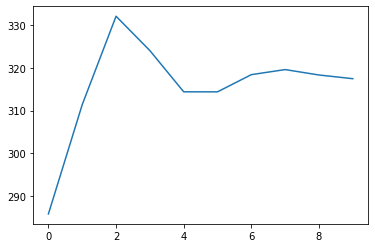

In [34]:
# For Germany

H_out = 10
diff_drate = np.append(diff_drate, np.zeros((H_out)))
level_pred1_out = np.zeros((H_out,))

for i in range(H_out):
    window = diff_drate[i:160+i]
    model1_out = ARIMA(window, order=(2,0,0))
    model1_out_fit = model1_out.fit(trend = 'nc', disp=0)
    # one step forecast
    diff_drate[161+i] = model1_out_fit.forecast()[0]    
    level_pred1_out[i] = diff_drate[161+i] + drate[161] #get levels
    
plt.plot(level_pred1_out)
level_pred1_out    

array([19.23246   , 21.17600617, 11.68258254,  8.19683621, 12.08611531,
       15.39055   , 14.29187283, 12.0988556 , 11.98265747, 13.16549716])

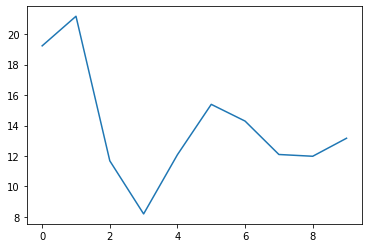

In [35]:
# For Austria

diff_arate = np.append(diff_arate, np.zeros((H_out)))
level_pred2_out = np.zeros((H_out,))

for i in range(H_out):
    window = diff_arate[i:160+i]
    model2_out = ARIMA(window, order=(2,0,0))
    model2_out_fit = model2_out.fit(trend = 'nc', disp=0)
    # one step forecast
    diff_arate[161+i] = model2_out_fit.forecast()[0]    
    level_pred2_out[i] = diff_arate[161+i] + arate[161] #get levels
    
plt.plot(level_pred2_out)
level_pred2_out

array([16.04549777, 11.93074185, 16.65513488, 17.77545125, 15.40961066,
       15.27596309, 16.39020697, 16.27103292, 15.77579427, 15.91122809])

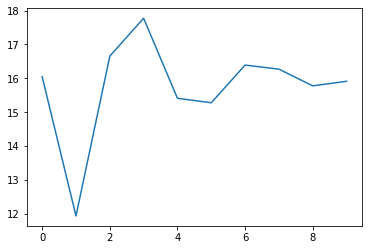

In [36]:
# For Switzerland

diff_srate = np.append(diff_srate, np.zeros((H_out)))
level_pred3_out = np.zeros((H_out,))

for i in range(H_out):
    window = diff_srate[i:160+i]
    model3_out = ARIMA(window, order=(2,0,0))
    model3_out_fit = model3_out.fit(trend = 'nc', disp=0)
    # one step forecast
    diff_srate[161+i] = model3_out_fit.forecast()[0]    
    level_pred3_out[i] = diff_srate[161+i] + srate[161] #get levels
    
plt.plot(level_pred3_out)
level_pred3_out
        

# Conclusion #

This work investigated empirically in a forecast application the number of new infections (NI) of COVID-19 for Germany, Austria, and Switzerland. Techniques from the time series analysis are used to provide forecasts as accurate as possible. Therefore, by using the ADF test it is guaranteed that the processes are stationary. For the Model choice, the ACF and PACF plots are used. It was found that an AR model can capture the serial autocorrelation of the processes. After the model choice, the In-Sample-Fit results are provided and discussed. ACF and PACF analysis of the residuals and the portmanteau tests are used for model validation. No remaining serial autocorrelation was found, which led to the conclusion that the models are adequate. In the last step pseudo-out-of-sample forecasts and 10 days of true-out-of-sample forecasts were provided.

In general, it can be highlighted that using empirical methods for predicting a target variable is the most powerful strategy. However, it should be mentioned that regarding COVID-19 it is not only enough to rely on model forecasts and scientific procedures. The number of new infections and the combatting of COVID depends also on other exogenous factors, as compliance of rules by the population, that have been introduced through political decisions in the corresponding countries. 

### Further Work ###

Since this work is based on a period from 01/01/2020 - 06/10/2020, it would be reasonable to update the data set with the current numbers of new infections for the three countries from time to time.

It would be also interesting, to analyze the predictions of the number of new infections based on machine learning techniques such as Natural Language Processing (NLP).
For example, with the method of NLP the number of words which are asigned to reinforce or loosening the rules in newsarticles or magazine headlines can be counted.

Thereby, a downward trend in the NI can be predicted if for example the number of words asigned to reinforcement of rules outweigh the number of words asigned to loosening. In turn, an increase in NI can be expected if the number of words asigned to loosening exceeds that of reinforcements.